In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_json("https://pomber.github.io/covid19/timeseries.json")

In [3]:
#taking a look at the structure of data for a specefic country
data["US"].head()

0    {'date': '2020-1-22', 'confirmed': 1, 'deaths'...
1    {'date': '2020-1-23', 'confirmed': 1, 'deaths'...
2    {'date': '2020-1-24', 'confirmed': 2, 'deaths'...
3    {'date': '2020-1-25', 'confirmed': 2, 'deaths'...
4    {'date': '2020-1-26', 'confirmed': 5, 'deaths'...
Name: US, dtype: object

In [4]:
#the objective is to create a table of countries and dates as columns with confirmed cases as values
data_to_use = pd.DataFrame()

In [5]:
#creating a dates column

#making a list of countries
countries = data.columns

dates = []
for x,y in zip(range(0,len(data)),countries):
    date_extracted = data[y][x]["date"]
    dates.append(date_extracted)
data_to_use["date"]=dates

In [6]:

#adding ccountries as columns
for i in countries:
    data_to_use[i] = 0
    data_to_use[i] = data_to_use[i].astype(float)

In [7]:
#updating values of cells to confirmed cases
for country in countries:
    for x in range(0,len(data)):
        data_to_use.at[x,country] = data[country][x]["confirmed"]
    

In [8]:
#previewing results
for i in countries:
    data_to_use[i].astype(float)
data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana
0,2020-1-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-1-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-1-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-1-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-1-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020-3-26,94.0,174.0,367.0,224.0,4.0,7.0,502.0,290.0,2810.0,...,6.0,1.0,84.0,2.0,4.0,2.0,71.0,0.0,0.0,0.0
65,2020-3-27,110.0,186.0,409.0,267.0,4.0,7.0,589.0,329.0,3143.0,...,6.0,1.0,91.0,2.0,11.0,2.0,86.0,8.0,0.0,0.0
66,2020-3-28,110.0,197.0,454.0,308.0,5.0,7.0,690.0,407.0,3640.0,...,8.0,3.0,98.0,2.0,18.0,2.0,91.0,8.0,2.0,0.0
67,2020-3-29,120.0,212.0,511.0,334.0,7.0,7.0,745.0,424.0,3984.0,...,8.0,8.0,109.0,2.0,18.0,2.0,94.0,10.0,2.0,0.0


In [9]:
cases_data_to_use_t = data_to_use.set_index(data_to_use["date"])
cases_data_to_use_t = data_to_use.transpose(copy = True)
cases_data_to_use_t.reset_index()
cases_data_to_use_t.to_csv("cases_data_to_use_t.csv", index_label = False)

In [10]:
#creating a new cases df
new_cases_to_use = data_to_use.copy()

#updating values to new cases
for country in countries:
    for x in range(1,len(data)):
        if data_to_use[country][x-1] != 0:
            new_cases_to_use.at[x,country] = data_to_use[country][x] - data_to_use[country][x-1]
        else: 
            new_cases_to_use.at[x,country] = data_to_use[country][x]
new_cases_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana
0,2020-1-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-1-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-1-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-1-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-1-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020-3-26,10.0,28.0,65.0,36.0,1.0,4.0,115.0,25.0,446.0,...,3.0,0.0,25.0,0.0,2.0,0.0,71.0,0.0,0.0,0.0
65,2020-3-27,16.0,12.0,42.0,43.0,0.0,0.0,87.0,39.0,333.0,...,0.0,0.0,7.0,0.0,7.0,0.0,15.0,8.0,0.0,0.0
66,2020-3-28,0.0,11.0,45.0,41.0,1.0,0.0,101.0,78.0,497.0,...,2.0,2.0,7.0,0.0,7.0,0.0,5.0,0.0,2.0,0.0
67,2020-3-29,10.0,15.0,57.0,26.0,2.0,0.0,55.0,17.0,344.0,...,0.0,5.0,11.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0


In [11]:
#creating a growth factor df
growth_data_to_use = new_cases_to_use.copy()

In [12]:
#updating values to growth factor
for country in countries:
    for x in range(1,len(data)):
        if new_cases_to_use[country][x-1] != 0:
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x] / new_cases_to_use[country][x-1]
        else: 
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x]

In [13]:
growth_data_to_use["Korea, South"].tail(10)

59     1.689655
60     1.102041
61     0.000000
62    76.000000
63     1.315789
64     1.040000
65     0.875000
66     1.604396
67     0.719178
68     0.742857
Name: Korea, South, dtype: float64

In [14]:
growth_data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana
0,2020-1-22,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,2020-1-23,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,2020-1-24,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,2020-1-25,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,2020-1-26,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020-3-26,1.0,1.217391,1.710526,1.500000,1.0,4.0,115.000000,1.562500,1.393750,...,3.0,0.0,25.000000,0.0,1.0,0.0,71.000000,0.0,0.0,0.0
65,2020-3-27,1.6,0.428571,0.646154,1.194444,0.0,0.0,0.756522,1.560000,0.746637,...,0.0,0.0,0.280000,0.0,3.5,0.0,0.211268,8.0,0.0,0.0
66,2020-3-28,0.0,0.916667,1.071429,0.953488,1.0,0.0,1.160920,2.000000,1.492492,...,2.0,2.0,1.000000,0.0,1.0,0.0,0.333333,0.0,2.0,0.0
67,2020-3-29,10.0,1.363636,1.266667,0.634146,2.0,0.0,0.544554,0.217949,0.692153,...,0.0,2.5,1.571429,0.0,0.0,0.0,0.600000,2.0,0.0,0.0


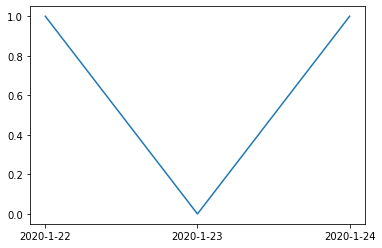

In [15]:
#plotting the data to preview
plt.plot(growth_data_to_use["date"][:3], growth_data_to_use["US"][:3] )

In [16]:
#saving growth as json
growth_data_to_use.to_json("growth.json")
#saving growth as csv
growth_data_to_use.to_csv("growth.csv")

In [17]:
#creating a decision tree for a tabel with an analysis of each country's infection rate
up_country = []
growth_factor = []
cases = []
analysis = []
avg_growth_factor_past_2_days = []
new_cases = []
for country in countries:

        
        if data_to_use[country][len(data)-10] == 0:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("New to The Pandemic") 
        elif data_to_use[country][len(data)-1] < 229 and growth_data_to_use[country][len(data)-1] <= 2 or new_cases_to_use[country][len(data)-1] ==0  :
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Can Be Contained!")
        elif data_to_use[country][len(data)-1] < 500 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 >1) :
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] < 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 >1) :
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1 and new_cases_to_use[country][len(data)-1] <229):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1] >1) or new_cases_to_use[country][len(data)-1] >229):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Has Gotten Out of Control!")
        else:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("Analysis is Pending Additional Data")



      
    
growth_chart_df = pd.DataFrame()
growth_chart_df["country"] = up_country
growth_chart_df["growth_factor"]= growth_factor
growth_chart_df["cases"]= cases
growth_chart_df["analysis"]= analysis
growth_chart_df["growth_factor_mod"]= avg_growth_factor_past_2_days
growth_chart_df["new_cases"] = new_cases


In [18]:
#checking the output snapshot, reviewing if the analysis falls in correctly and no rows are missed
growth_chart_df.sort_values(by = "cases")

,country,growth_factor,cases,analysis,growth_factor_mod,new_cases
166,Timor-Leste,0.000000,1.0,New to The Pandemic,0.000000,0.0
127,Saint Vincent and the Grenadines,0.000000,1.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
116,Papua New Guinea,0.000000,1.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
176,MS Zaandam,0.000000,2.0,New to The Pandemic,0.000000,0.0
88,Liberia,0.000000,3.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
...,...,...,...,...,...,...
60,Germany,1.088636,66885.0,COVID-19 Spread Has Gotten Out of Control!,0.866710,4790.0
32,China,0.617886,82198.0,COVID-19 Spread is Possibly Getting Under Cont...,0.911884,76.0
138,Spain,1.141236,87956.0,COVID-19 Spread Has Gotten Out of Control!,1.027976,7846.0
77,Italy,0.776308,101739.0,COVID-19 Spread Has Gotten Out of Control!,0.824796,4050.0


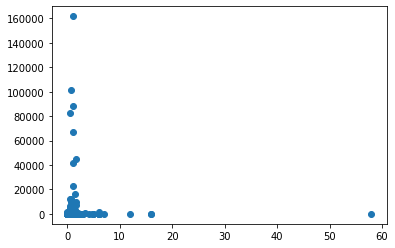

In [19]:
plt.scatter(growth_chart_df["growth_factor"],growth_chart_df["cases"])

In [20]:
growth_chart_df.to_csv("growth_category.csv")